### 감성분석  -> 머신러닝
- 데이터셋 : 전처리
- BOW 모델
  - 단어를 특정 벡터로 변환
  - tf-idf 단어 적합성 평가
  - 텍스트 데이터 정제
  - 문서를 토큰으로 나누기
- LogisticRegession 모델 사용


In [82]:
# 데이터 셋
# http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

In [83]:
# 부정 리뷰 데이터프레임으로 만들기

import pandas as pd
from glob import glob

# 경로는 /로 바꾸거나 \를 두개씩 넣어준다
file_lists = glob('C:/python_src/machine_learning/감성분석/data/movie/train/neg/*.txt')

pd_lists = []
for file_path in file_lists[:500]:
    with open(file_path,'r',encoding='utf-8') as f:          #'r'는 열기모드
        data = {
            'review' : f.read(),
            'target': 0
        }
        df = pd.DataFrame([data])
        pd_lists.append(df)
train_neg_df = pd.concat(pd_lists, ignore_index=True)
train_neg_df.head()


,review,target
0,Story of a man who has unnatural feelings for ...,0
1,OK its not the best film I've ever seen but at...,0
2,"Amateur, no budget films can be surprisingly g...",0
3,My girlfriend once brought around The Zombie C...,0
4,"Without wishing to be a killjoy, Brad Sykes is...",0


In [84]:
# positive 동일하게 train_pos_df
# train_df = pd.concat([train_neg_df, train_pos_df])
# movie_data.csv로 저장

In [85]:
# 긍정리뷰 데이터프레임으로 만들기
file_lists = glob('C:/python_src/machine_learning/감성분석/data/movie/train/pos/*.txt')

pd_lists = []
for file_path in file_lists[:500]:
    with open(file_path,'r',encoding='utf-8') as f:          #'r'는 열기모드
        data = {
            'review' : f.read(),
            'target': 1
        }
        df = pd.DataFrame([data])
        pd_lists.append(df)
train_pos_df = pd.concat(pd_lists, ignore_index=True)
train_pos_df.head()

,review,target
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,I liked the film. Some of the action scenes we...,1
2,Somewhat funny and well-paced action thriller ...,1
3,Just two comments....SEVEN years apart? Hardly...,1
4,"Another Aussie masterpiece, this delves into t...",1


In [86]:
# 긍정리뷰 부정리뷰 합치고 csv로 저장

train_df = pd.concat([train_neg_df, train_pos_df],ignore_index=True)
train_df.to_csv('movie_data.csv', index=False, encoding='utf-8-sig')
print("movie_data.csv 파일이 성공적으로 저장되었습니다.")
print("생성된 데이터프레임 샘플:")
print(train_df.head())


movie_data.csv 파일이 성공적으로 저장되었습니다.
생성된 데이터프레임 샘플:
                                              review  target
0  Story of a man who has unnatural feelings for ...       0
1  OK its not the best film I've ever seen but at...       0
2  Amateur, no budget films can be surprisingly g...       0
3  My girlfriend once brought around The Zombie C...       0
4  Without wishing to be a killjoy, Brad Sykes is...       0


In [87]:
df = pd.read_csv('movie_data.csv')
df.head()

,review,target
0,Story of a man who has unnatural feelings for ...,0
1,OK its not the best film I've ever seen but at...,0
2,"Amateur, no budget films can be surprisingly g...",0
3,My girlfriend once brought around The Zombie C...,0
4,"Without wishing to be a killjoy, Brad Sykes is...",0


In [88]:
# BoW(Bag of Words)모델
# 문자를 숫자벡터
# 단어의 등장횟수를 카운트
# 전체 훈련데이터에서 모든 고유한 단어(토큰)로 어휘 사전
# 각 문서(리뷰데이터)를 사전을 기준으로 벡터화 N번째 단어가 문서에서 3번 나오면 벡터의 N번째 값이 3이 된다
# 문서1 : '나는 영화가 좋다'
# 문서2 : '나는 영화가 싫다'
# 사전 : {'나는' : 0, '영화가' : 1, '좋다' : 2, '싫다': 3}
# 벡터화는 사전의 크기만큼 모든 문장의 길이를 동일하게
# 문서1벡터 : [0,1,2] -> [1,1,1,0]        # '나는 영화가 좋다' 라는 묹당에서 [1,1,1] 나는, 영화가, 좋다, 싫다 가 몇번들어갔는지
# 문서2벡터 : [0,1,3] -> [1,1,0,1] 


In [89]:
# 문자 안의 단어를 숫자 백터로 변환하는 과정
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer()
docs = np.array([           # 넘파이 형태로 만들어줘야 함
    "The sun is shining",
    'The wearther is swwer'
])
bag = count.fit_transform(docs)
df

,review,target
0,Story of a man who has unnatural feelings for ...,0
1,OK its not the best film I've ever seen but at...,0
2,"Amateur, no budget films can be surprisingly g...",0
3,My girlfriend once brought around The Zombie C...,0
4,"Without wishing to be a killjoy, Brad Sykes is...",0
...,...,...
995,"'The second beginning' as it's title explains,...",1
996,For those that were interested in knowing how ...,1
997,"along with it's partner, this is the greatest ...",1
998,This is part one of a short animation clip sho...,1


In [90]:
# 저장된 사전보기
count.vocabulary_           # 만들어진 사전. 단어별 부여된 번호를 알 수 있다

{'the': 4, 'sun': 2, 'is': 0, 'shining': 1, 'wearther': 5, 'swwer': 3}

In [91]:
# 문서 d에 등장한 단어 t의 횟수를 tf(t,d)
# BoW를 보완하면서 좀 더 정교한 텍스트 벡터화 방식 TF-IDF(Term Frequenct - Inverse Document Frequency)
# TF-IDF 단어가 얼마나 중요한 단어인지를 판단하는 것. 문서에서 자주 나오지만, 전체 문서에서는 드문 단어를 높게 평가하는 방식 즉 특정 문서에서만 자주 쓰이는 단어일수록 중요
# TF : 특정문서에서 자주 등장하는 단어
# IDF : 전체문서에 드물게 등장하는 단어
# 특정문서에서 자주 등장하지만 전체 문장에서 드물게 등장하는 단어에 높은 가중치를 부여 - 그 문장을 잘 대표하는 핵심 단어를 찾는다
# TF(t,d) 단어 t가 문장 d에 나타난 횟수 / 문서d의 모든 단어수
# IDF(t,D) : 총 문서수 |D| / 단어 t를 포함한 문서의 수 df(t) ->log 단어의 희귀성을 너무 과하게 반영하지 않도록 스케일링
# 분모에 +1(사이킷런의 경우) : 분모가 0이 되는 것을 방지
# log(1+|D|/ 1+df(f)) 

# TF-IDF(t,d,D) = TF(t,d) x IDF(t,D)

# '명작'
# TF : 리뷰에 3번 나옴 (중요도 높음)
# IDF : 전체 10000개 리뷰 중에 50개 나옴(매우 높음)
# TF-IDF 높음X매우 높음 = 높음(핵심단어)

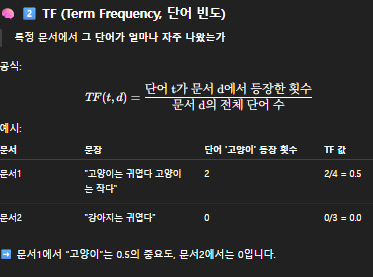

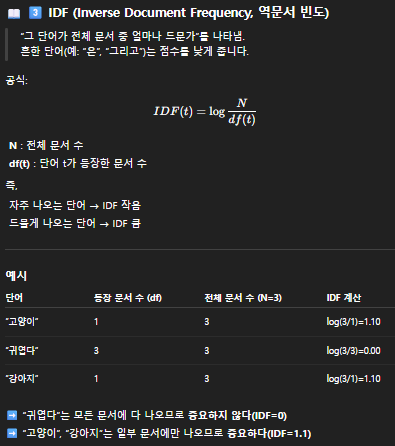

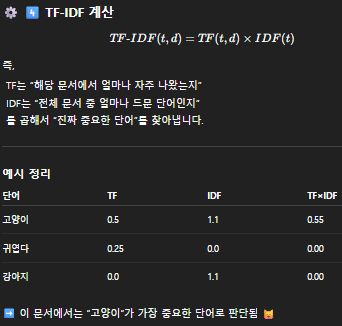

In [92]:
# 데이터 정제를 하는 이유 html tag 과 같은 불필요한 straing((<\br>)) 을 없애주기 위해서 

import re 
def preprocessor(s):
    # 1. 영문, 공백, ., , 만 남기기
    clean = re.sub(r'[^A-Za-z\s\.,]+', '', s)
    # 2. 연속된 마침표 (...)를 마침표 하나로
    clean = re.sub(r'\.{2,}','.',clean)
    # 3. 연속된 공백 정리
    clean = re.sub(r'\s+',' ',clean).strip()
    return clean

df['review'] = df.review.apply(preprocessor)    # 함수 적용
df['review'] 


0      Story of a man who has unnatural feelings for ...
1      OK its not the best film Ive ever seen but at ...
2      Amateur, no budget films can be surprisingly g...
3      My girlfriend once brought around The Zombie C...
4      Without wishing to be a killjoy, Brad Sykes is...
                             ...                        
995    The second beginning as its title explains, sh...
996    For those that were interested in knowing how ...
997    along with its partner, this is the greatest p...
998    This is part one of a short animation clip sho...
999    This is the second part of The Animatrix, a co...
Name: review, Length: 1000, dtype: object

In [93]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [94]:
# 문서를 토큰으로 나누기
from nltk.stem.porter import PorterStemmer

def tokenizer(text):        # tokenizer 단어 단위로 끊어주는 것
    return text.split()

porter = PorterStemmer()
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

# 어간 추출 Stemming 단어의 접미사 -s, -es, -ing, -ed 등등을 강제로 제거해서 단어의 원형을 찾는 과정
tokenizer(df.review[0])
tokenizer_porter(df.review[0])


['stori',
 'of',
 'a',
 'man',
 'who',
 'ha',
 'unnatur',
 'feel',
 'for',
 'a',
 'pig.',
 'start',
 'out',
 'with',
 'a',
 'open',
 'scene',
 'that',
 'is',
 'a',
 'terrif',
 'exampl',
 'of',
 'absurd',
 'comedy.',
 'a',
 'formal',
 'orchestra',
 'audienc',
 'is',
 'turn',
 'into',
 'an',
 'insane,',
 'violent',
 'mob',
 'by',
 'the',
 'crazi',
 'chant',
 'of',
 'it',
 'singers.',
 'unfortun',
 'it',
 'stay',
 'absurd',
 'the',
 'whole',
 'time',
 'with',
 'no',
 'gener',
 'narr',
 'eventu',
 'make',
 'it',
 'just',
 'too',
 'off',
 'putting.',
 'even',
 'those',
 'from',
 'the',
 'era',
 'should',
 'be',
 'turn',
 'off.',
 'the',
 'cryptic',
 'dialogu',
 'would',
 'make',
 'shakespear',
 'seem',
 'easi',
 'to',
 'a',
 'third',
 'grader.',
 'on',
 'a',
 'technic',
 'level',
 'it',
 'better',
 'than',
 'you',
 'might',
 'think',
 'with',
 'some',
 'good',
 'cinematographi',
 'by',
 'futur',
 'great',
 'vilmo',
 'zsigmond.',
 'futur',
 'star',
 'salli',
 'kirkland',
 'and',
 'freder',
 

In [95]:
%pip install stopwords 

Note: you may need to restart the kernel to use updated packages.


In [96]:
# 불용어 - 자연어 처리에서 분석에 큰 의미가 없는 단어들
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')      # 불용어 사전 다운로드
stops= stopwords.words('english')  # stopwords.words() : 불용어 리스트 가져오기 함수, 'english' : 영어 불용어를 가져오겠다는 의미

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SAMSUNG\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [97]:
df.head()       # 전처리 완료 정규식을 이용한

,review,target
0,Story of a man who has unnatural feelings for ...,0
1,OK its not the best film Ive ever seen but at ...,0
2,"Amateur, no budget films can be surprisingly g...",0
3,My girlfriend once brought around The Zombie C...,0
4,"Without wishing to be a killjoy, Brad Sykes is...",0


In [98]:
from sklearn.model_selection import train_test_split
X = df.review  
y = df.target

x_train,x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=42)



In [99]:
# 어간추출(postStemmer) -> stopwor에 포함된 단어 제거
porter = PorterStemmer()
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split() if word not in stops]

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [100]:
tfidf = TfidfVectorizer(
    tokenizer=tokenizer_porter,
    ngram_range=(1,1)          # (1,1) 유니그램(unigramm, 단일단어)만 사용
)

LogisticRegression
pipeline = Pipeline([
    ('tfidf', tfidf),
    ('clf', LogisticRegression())
])

In [101]:
pipeline.fit(x_train,y_train)

c:\Users\SAMSUNG\anaconda3\envs\deep\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,steps,"[('tfidf', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,<function tok...0016019663CE0>


In [102]:
pipeline.predict(x_test)

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1])

In [103]:
pipeline.score(x_test,y_test)


0.855

In [104]:
# 원본데이터 로드
# 토크나이져 함수를 정의
    # 텍스트 전처리
    # 공백을 기준으로 단어 단위로 분리
    # 영어는 전부 소문자로 변환
    # 어간 추출
    # 불용어 제거
# TFIDF 정의
    # 토크나이져 메게변수 = 토크나이져 함수
    # ngram (1,1)
# 파이프라인으로 tfidf, 머신러닝
# 파이프라인으로 학습
# 파이프라인으로 평가 (classifictaion_report)
# 과적합여부 확인
    # train 데이터와 test 데이터로 성능을 비교
# train에 있는 데이터로 학습 - 적당한 크기로 
# test 폴더에 있는 문장으로 평가
    

In [105]:
# 부정 리뷰 데이터프레임으로 만들기

import pandas as pd
from glob import glob

# 경로는 /로 바꾸거나 \를 두개씩 넣어준다
file_lists = glob('C:/python_src/machine_learning/감성분석/data/movie/train/neg/*.txt')

pd_lists = []
for file_path in file_lists[:1000]:
    with open(file_path,'r',encoding='utf-8') as f:          #'r'는 열기모드
        data = {
            'review' : f.read(),
            'target': 0
        }
        df = pd.DataFrame([data])
        pd_lists.append(df)
train_neg_df = pd.concat(pd_lists, ignore_index=True)
train_neg_df.head()

,review,target
0,Story of a man who has unnatural feelings for ...,0
1,OK its not the best film I've ever seen but at...,0
2,"Amateur, no budget films can be surprisingly g...",0
3,My girlfriend once brought around The Zombie C...,0
4,"Without wishing to be a killjoy, Brad Sykes is...",0


In [106]:
# 긍정리뷰 데이터프레임으로 만들기
file_lists = glob('C:/python_src/machine_learning/감성분석/data/movie/train/pos/*.txt')

pd_lists = []
for file_path in file_lists[:1000]:
    with open(file_path,'r',encoding='utf-8') as f:          #'r'는 열기모드
        data = {
            'review' : f.read(),
            'target': 1
        }
        df = pd.DataFrame([data])
        pd_lists.append(df)
train_pos_df = pd.concat(pd_lists, ignore_index=True)
train_pos_df.head()

,review,target
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,I liked the film. Some of the action scenes we...,1
2,Somewhat funny and well-paced action thriller ...,1
3,Just two comments....SEVEN years apart? Hardly...,1
4,"Another Aussie masterpiece, this delves into t...",1


In [107]:
# 부정 데스트 데이터프레임으로 만들기

import pandas as pd
from glob import glob

# 경로는 /로 바꾸거나 \를 두개씩 넣어준다
file_lists = glob('C:/python_src/machine_learning/감성분석/data/movie/test/neg/*.txt')

pd_lists = []
for file_path in file_lists[:500]:
    with open(file_path,'r',encoding='utf-8') as f:          #'r'는 열기모드
        data = {
            'review' : f.read(),
            'target': 0
        }
        df = pd.DataFrame([data])
        pd_lists.append(df)
test_neg_df = pd.concat(pd_lists, ignore_index=True)
test_neg_df.head()

,review,target
0,Some changes for the better (the special effec...,0
1,What a terrible sequel. The reason I give this...,0
2,Two years after leaving the small town of Grov...,0
3,1st watched 7/29/2001 - 4 out of 10 (Dir-Mark ...,0
4,"This movie didn't do it for me, an avid SNL fa...",0


In [108]:
# 긍정 데스트 데이터프레임으로 만들기

import pandas as pd
from glob import glob

# 경로는 /로 바꾸거나 \를 두개씩 넣어준다
file_lists = glob('C:/python_src/machine_learning/감성분석/data/movie/test/pos/*.txt')

pd_lists = []
for file_path in file_lists[:500]:
    with open(file_path,'r',encoding='utf-8') as f:          #'r'는 열기모드
        data = {
            'review' : f.read(),
            'target': 0
        }
        df = pd.DataFrame([data])
        pd_lists.append(df)
test_pos_df = pd.concat(pd_lists, ignore_index=True)
test_pos_df.head()

,review,target
0,Cliche romance drama movie with very simple pl...,0
1,This movie is the best one forever upon the wa...,0
2,"On a second viewing, this is still a wonderful...",0
3,"After many, many years I saw again this beauti...",0
4,It stars war correspondent William Holden sepa...,0


In [109]:
train_df = pd.concat([train_neg_df, train_pos_df],ignore_index=True)
train_df.to_csv('movie_data_train.csv', index=False, encoding='utf-8-sig')

test_df = pd.concat([test_neg_df, test_pos_df],ignore_index=True)
test_df.to_csv('movie_data_test.csv', index=False, encoding='utf-8-sig')

print("movie_data.csv 파일이 성공적으로 저장되었습니다.")
print("생성된 데이터프레임 샘플:")
print(train_df.head())
print(test_df.head())

df_train = pd.read_csv('movie_data_train.csv')
df_test = pd.read_csv('movie_data_test.csv')


movie_data.csv 파일이 성공적으로 저장되었습니다.
생성된 데이터프레임 샘플:
                                              review  target
0  Story of a man who has unnatural feelings for ...       0
1  OK its not the best film I've ever seen but at...       0
2  Amateur, no budget films can be surprisingly g...       0
3  My girlfriend once brought around The Zombie C...       0
4  Without wishing to be a killjoy, Brad Sykes is...       0
                                              review  target
0  Some changes for the better (the special effec...       0
1  What a terrible sequel. The reason I give this...       0
2  Two years after leaving the small town of Grov...       0
3  1st watched 7/29/2001 - 4 out of 10 (Dir-Mark ...       0
4  This movie didn't do it for me, an avid SNL fa...       0


In [110]:
# 문자 안의 단어를 숫자 백터로 변환하는 과정
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer()
docs = np.array([           # 넘파이 형태로 만들어줘야 함
    "The sun is shining",
    'The wearther is swwer'
])
bag = count.fit_transform(docs)
df_train
df_test

,review,target
0,Some changes for the better (the special effec...,0
1,What a terrible sequel. The reason I give this...,0
2,Two years after leaving the small town of Grov...,0
3,1st watched 7/29/2001 - 4 out of 10 (Dir-Mark ...,0
4,"This movie didn't do it for me, an avid SNL fa...",0
...,...,...
995,"Sex, drugs, racism and of course you ABC's. Wh...",0
996,I love this show. My girlfriend was gonna get ...,0
997,"Seeing this show gives me respect for MTV, tho...",0
998,I'm torn about this show. While MOST parts of ...,0


In [118]:
# 데이터 전처리
from nltk.stem import PorterStemmer
import re 
porter = PorterStemmer()
def preprocessor(test):
    # 1. 영문, 공백, ., , 만 남기기
    clean = re.sub(r'[^A-Za-z\s\.,]+', '', test)
    # 2. 연속된 마침표 (...)를 마침표 하나로
    clean = re.sub(r'\.{2,}','.',clean)
    # 3. 연속된 공백 정리
    clean = re.sub(r'\s+',' ',clean).strip()
    # 단어분리 - 어간분리 - 불용어제거
    words = [porter.stem(word) for word in clean.split() if word not in stops]
    return ' '.join(words)

tfidf = TfidfVectorizer(
    tokenizer=tokenizer_porter,
    ngram_range=(1,1)  
)
pipeline = Pipeline([
    ('tfidf', tfidf),
    ('clf', LogisticRegression())
])

df_train['review'] = df_train['review'].apply(lambda x: ' '.join(x))
df_test['review'] = df_test['review'].apply(lambda x: ' '.join(x))

df_train['review'] 
df_test['review'] 


0      some chang better special effect elaborate, wo...
1      what terribl sequel. the reason i give film tw...
2      two year leav small town grover bend due encou...
3      st watch dirmark dindal fastpaced, frantic ani...
4      thi movi didnt me, avid snl fan past years. ja...
                             ...                        
995    sex, drugs, racism cours abcs. what could want...
996    i love show. my girlfriend gonna get abort wat...
997    see show give respect mtv, though imagin mtv s...
998    im torn show. while most part i found hilariou...
999    i plagu nightmar involv sesam street muppet sh...
Name: review, Length: 1000, dtype: object

In [ ]:
# 원본데이터로드..
# 토크나이져 함수를 정의
    # 텍스트 전처리
    # 공백을 기준으로 단어단위로 분리
    # 영어는 전부 소문자로 변환
    # 어간 추출
    # 불용어 제거
# TFIDF를 정의
    # 토크나이져 매개변수 = 토크나이져 함수
    # ngram  (1,1)
# 파이프라인으로 tfidf, 머신러닝
# 파이프라이으로 학습
# 파이프라인으로 평가( classification_report)
# 과적합여부 확인

# train 폴더에 있는데이터로 학습 - 적당한 크기로
# test 폴더에 있는 문장으로 평가

In [120]:
x_train = df_train['review']
y_train = df_train['target']

x_test = df_test['review']
y_test = df_test['target']

pipeline.fit(x_train, y_train)
pipeline.predict(x_test)
pipeline.score(x_test,y_test)


c:\Users\SAMSUNG\anaconda3\envs\deep\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


0.567